# 01. Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing Data

In [2]:
# Store path to main project folder
path = r'/Users/emilycurcio/Desktop/CareerFoundry/Data Immersion/Ach 4 Python Fundamentals/03-2024 Instacart Basket Analysis'

In [3]:
# Import latest ords_prods_merge data set
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_v4.pkl'))

In [4]:
ords_prods_merge.shape

(32404859, 23)

In [5]:
ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_item_spend,spending_flag,median_days_since_prior_order,order_freq_flag
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Least busy,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Mid-range product,Least busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Mid-range product,Least busy,Least busy,Most orders,10,New customer,6.367797,Low spender,20.0,Regular customer


# 03. Bar Charts

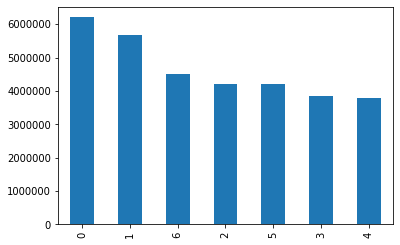

In [6]:
# Bar chart of orders_day_of_week
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

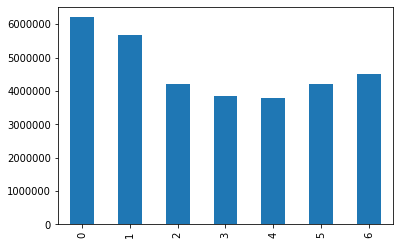

In [7]:
# Sort bars by order of index
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

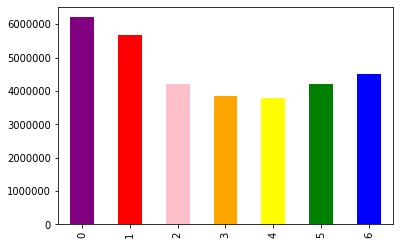

In [8]:
# Change color of bars
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color = 
                                                                            ['purple', 'red', 'pink', 'orange',
                                                                            'yellow', 'green', 'blue'])

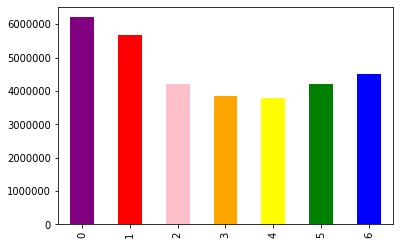

In [9]:
# Save chart to bar object
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color = 
                                                                            ['purple', 'red', 'pink', 'orange',
                                                                            'yellow', 'green', 'blue'])

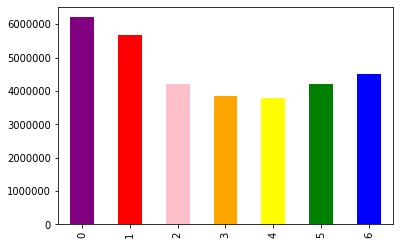

In [10]:
# Call bar object image
bar.figure

([<matplotlib.axis.XTick at 0x7f830288e790>,
 <a list of 7 Text xticklabel objects>)

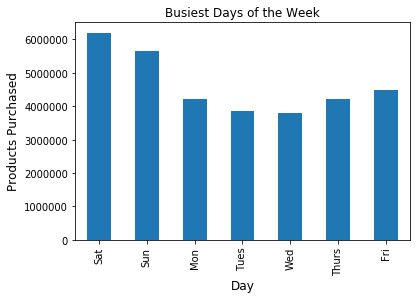

In [11]:
# Add axis labels and title

bar2 = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

plt.ylabel('Products Purchased', fontsize = 12)
plt.xlabel('Day', fontsize = 12)
plt.title('Busiest Days of the Week', fontsize = 12)

plt.xticks(np.arange(7), ['Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri'])

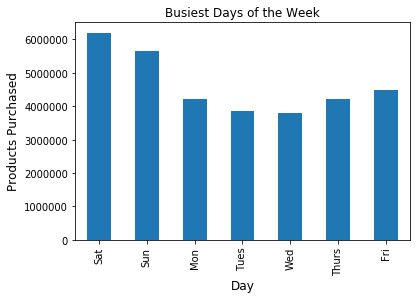

In [12]:
bar2.figure

# 04. Exporting Image File

In [13]:
# Export as png
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'), bbox_inches = 'tight')

# 05. Histograms and Scatterplots

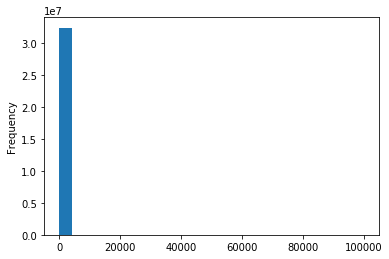

In [14]:
# Try creating a historgram
ords_prods_merge['prices'].plot.hist(bins = 25)

### Back to data cleaning...

In [15]:
# Check summary stats of prices column
# Notice the max value is 99,999
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

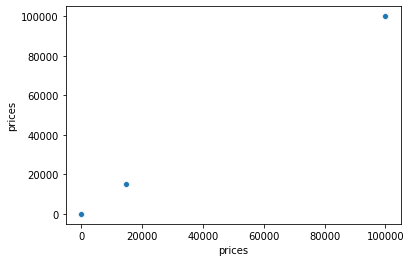

In [16]:
# Use scatterplot to find any outliers
# We were expecting the point close to 100,000, but what about the point close to 20,000
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [17]:
# Look for anything above the “normal” price of a supermarket item
# Notice there is actually quite a bit
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_item_spend,spending_flag,median_days_since_prior_order,order_freq_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Average orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High spender,11.5,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Busiest day,Busiest day,Average orders,4,New customer,1154.792308,High spender,11.5,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Busiest day,Average orders,16,Regular customer,114.426619,High spender,20.0,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,...,High-range product,Busiest day,Busiest day,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,...,High-range product,Busiest day,Busiest day,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,...,High-range product,Regularly busy,Least busy,Most orders,15,Regular customer,451.153540,High spender,4.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,...,High-range product,Regularly busy,Least busy,Average orders,12,Regular customer,1178.381871,High spender,7.0,Frequent customer


In [18]:
# Turn the prices > 100 into NaNs as they don't make sense
ords_prods_merge.loc[ords_prods_merge['prices'] > 100, 'prices'] = np.nan

In [19]:
# Check that it worked
ords_prods_merge['prices'].max()

25.0

In [20]:
# This data cleaning should ideally be caught before starting visualizations
# Export data to pkl
ords_prods_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_v5.pkl'))

### Back to histogram...

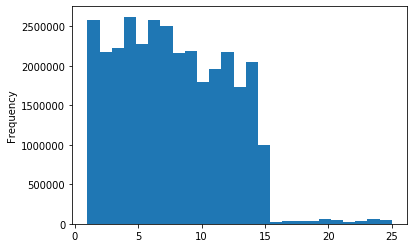

In [21]:
# Try creating a historgram again
ords_prods_merge['prices'].plot.hist(bins = 25)

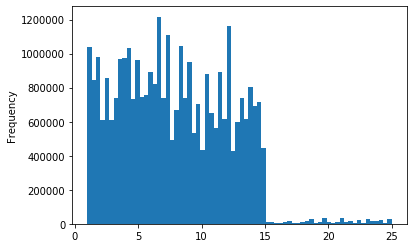

In [22]:
# To increase level of granularity, increase number of bins
hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [23]:
# Export as png
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

# 06. Sampling Data

In [24]:
# Python will always give you the same set of random numbers (in this case, seed “4”)
np.random.seed(4)
# Create a list holding True/False values to the test np.random.rand() <= 0.7
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [25]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [26]:
# Store 70% of the sample in the df big
big = ords_prods_merge[dev]

In [27]:
# Store 30% of the sample in the df small
small = ords_prods_merge[~dev]

In [28]:
# Check that it worked
len(ords_prods_merge)

32404859

In [29]:
len(big) + len(small)

32404859

In [30]:
# Only take required columns from the df
df_2 = small[['orders_day_of_week','prices']]

In [31]:
df_2.head()

,orders_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,1,9.0


# 07. Line Charts

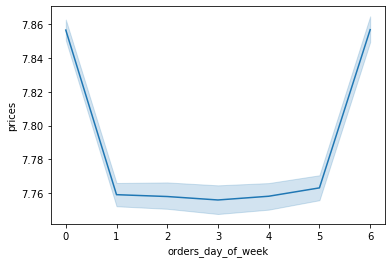

In [32]:
# Create line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [33]:
# Export as png
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_dow.png'))